# Francy

### A list of all Francy features, with examples, is available on the following notebook [Francy Features](francy-features.ipynb).
### Francy can be used to create new interactive packages, for instance the [FrancyMonoids](francy-monoids.ipynb) or [SubgroupLattice](subgroup-lattice.ipynb) packages.
### Francy has been extended and supports, apart from GAP, [Python](https://github.com/zerline/francy-widget) and [Julia](https://github.com/fieker/Francy) languages as backends.
### Francy inspired projects such as [JupyterViz](https://github.com/nathancarter/jupyterviz).

# How to make an existing Package interactive? 
### Francy can be used to enhance existing packages by providing interactive visualizations.
### As an example, lets use the package [Digraphs](https://www.gap-system.org/Packages/digraphs.html) from James Mitchell. This package already allows the creation of static images using GraphViz.
### Lets start by loading GAP packages for the demo:

In [ ]:
LoadPackage("francy");;
LoadPackage("digraph");;

 ### Imagine we want to represent the directed graph of all subgroups of the DihedralGroup $D_4$:

In [ ]:
G            := DihedralGroup(4);
allSubgroups := AllSubgroups(G);
digraph      := Digraph(allSubgroups, {H, K} -> IsSubgroup(H, K));

<pc group of size 4 with 2 generators>

[ Group([  ]), Group([ f1 ]), Group([ f2 ]), Group([ f1*f2 ]),   <pc group of size 4 with 2 generators> ]

<immutable digraph with 5 vertices, 12 edges>

### Display the Digraph:

"//dot\ndigraph hgn{\nnode [shape=circle]\n1\n2\n3\n4\n5\n1 -> 1\n2 -> 1\n2 ->\ 2\n3 -> 1\n3 -> 3\n4 -> 1\n4 -> 4\n5 -> 1\n5 -> 2\n5 -> 3\n5 -> 4\n5 -> 5\n}\\n"

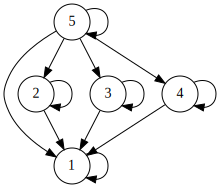

In [7]:
dot := DotDigraph(digraph);
JupyterSplashDot(dot);

### Now, we can obtain the same representation using Francy by:

In [ ]:
nodes    := [];;
vertices := DigraphVertices(digraph);;
edges    := DigraphEdges(digraph);;

graph := Graph(GraphType.DIRECTED);;

for i in vertices do
    nodes[i] := Shape(ShapeType.CIRCLE, String(i));;
    Add(graph, nodes[i]);;
od;;

for i in edges do
    Add(graph, Link(nodes[i[1]], nodes[i[2]]));;
od;;

canvas := Canvas(Concatenation("Subgroups Digraph of ", String(G)));;
Add(canvas, graph);;

graphviz := FrancyRenderer(FrancyRendererType.GRAPHVIZ_DOT);;
Add(canvas, graphviz);;

Draw(canvas);

### Now, if we wanted to make it interactive by checking whether a subgroup is simple or not, for instance, we could extend the previous code:

In [ ]:
FrancyDigraphs := function(G)
    local as, d, v, e, graph, nodes, m, IsGroupSimple, canvas, i, graphviz;

    as := AllSubgroups(G);

    d := Digraph(as, {H, K} -> IsSubgroup(H, K));;
    v := DigraphVertices(d);;
    e := DigraphEdges(d);;

    graph := Graph(GraphType.DIRECTED);;
    canvas := Canvas(Concatenation("Subgroups Digraph of ", String(G)));;
    Add(canvas, graph);;

    nodes := [];;

    # Explanatory message to show everytime
    m := FrancyMessage(FrancyMessageType.INFO, "Simple Groups", 
    "A group is simple if it is nontrivial and has no nontrivial normal subgroups.");;
    
    # Add a new function to be invoked on click
    IsGroupSimple := function(i)
        Add(canvas, m);;
        if IsSimpleGroup(as[i]) then
            Add(canvas, FrancyMessage("Simple", Concatenation("The vertex ", 
                String(i), ", representing the subgroup ", String(as[i]), ", is simple.")));;
        else
            Add(canvas, FrancyMessage("Not Simple", Concatenation("The vertex ", 
                String(i), ", representing the subgroup ", String(as[i]), ", is not simple.")));;
        fi;;
        return Draw(canvas);
    end;;

    for i in v do
        nodes[i] := Shape(ShapeType.CIRCLE, String(i));;
        # Add a menu on each node with a callback to the function created before
        Add(nodes[i], Menu("Simple", Callback(IsGroupSimple, [i])));;
        Add(graph, nodes[i]);;
    od;;

    for i in e do
        Add(graph, Link(nodes[i[1]], nodes[i[2]]));;
    od;;
    
    graphviz := FrancyRenderer(FrancyRendererType.GRAPHVIZ_DOT);;
    Add(canvas, graphviz);;

    return Draw(canvas);
end;

function( G ) ... end

In [20]:
FrancyDigraphs(G);